In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# Import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

n=800
pd.set_option('display.max_columns',n)
pd.set_option("display.max_info_rows", n)
pd.set_option('display.max_info_columns',n)
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder



In [56]:
import pandas as pd
import numpy as np
filename = '/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/adult.csv'
df = pd.read_csv(filename)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


**TARGET:income**

**What does one row represent? (A person? A business? An event? A product?)**

In [57]:
first_row = df.iloc[1]
first_row

age                                38
workclass                     Private
fnlwgt                          89814
education                     HS-grad
educational-num                     9
marital-status     Married-civ-spouse
occupation            Farming-fishing
relationship                  Husband
race                            White
gender                           Male
capital-gain                        0
capital-loss                        0
hours-per-week                     50
native-country          United-States
income                          <=50K
Name: 1, dtype: object

**The row above represent a person's profile in USA**

**How many features does the data have?**

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   age              int64 
 1   workclass        object
 2   fnlwgt           int64 
 3   education        object
 4   educational-num  int64 
 5   marital-status   object
 6   occupation       object
 7   relationship     object
 8   race             object
 9   gender           object
 10  capital-gain     int64 
 11  capital-loss     int64 
 12  hours-per-week   int64 
 13  native-country   object
 14  income           object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


**The dataset has over 14 features against the income target**

**How many rows are in the dataset?**

**The dataset as 48841 entries**

**What opportunities exist for dimensionality reduction or feature selection with this dataset?**

Yes, we can reduce education+eductional_num, marital_status+relationship+gender. capital_loss+capital_gain

In [59]:
# Convert the "educational-num" column to string type
df['educational-num'] = df['educational-num'].astype(str)

In [60]:
df['Family_status'] = df['marital-status'] + df['relationship'] + df['gender']
df['Asset_Value'] =df['capital-loss'] + df['capital-gain']
df['Education_status'] = df['education'] + df['educational-num']
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Family_status,Asset_Value,Education_status
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,Never-marriedOwn-childMale,0,11th7
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,Married-civ-spouseHusbandMale,0,HS-grad9
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,Married-civ-spouseHusbandMale,0,Assoc-acdm12
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,Married-civ-spouseHusbandMale,7688,Some-college10
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,Never-marriedOwn-childFemale,0,Some-college10


In [61]:
df.drop(columns=['marital-status', 'relationship', 'gender', 'capital-loss', 'capital-gain'], inplace=True)
df.head()

,age,workclass,fnlwgt,education,educational-num,occupation,race,hours-per-week,native-country,income,Family_status,Asset_Value,Education_status
0,25,Private,226802,11th,7,Machine-op-inspct,Black,40,United-States,<=50K,Never-marriedOwn-childMale,0,11th7
1,38,Private,89814,HS-grad,9,Farming-fishing,White,50,United-States,<=50K,Married-civ-spouseHusbandMale,0,HS-grad9
2,28,Local-gov,336951,Assoc-acdm,12,Protective-serv,White,40,United-States,>50K,Married-civ-spouseHusbandMale,0,Assoc-acdm12
3,44,Private,160323,Some-college,10,Machine-op-inspct,Black,40,United-States,>50K,Married-civ-spouseHusbandMale,7688,Some-college10
4,18,?,103497,Some-college,10,?,White,30,United-States,<=50K,Never-marriedOwn-childFemale,0,Some-college10


In [62]:
df.head()

,age,workclass,fnlwgt,education,educational-num,occupation,race,hours-per-week,native-country,income,Family_status,Asset_Value,Education_status
0,25,Private,226802,11th,7,Machine-op-inspct,Black,40,United-States,<=50K,Never-marriedOwn-childMale,0,11th7
1,38,Private,89814,HS-grad,9,Farming-fishing,White,50,United-States,<=50K,Married-civ-spouseHusbandMale,0,HS-grad9
2,28,Local-gov,336951,Assoc-acdm,12,Protective-serv,White,40,United-States,>50K,Married-civ-spouseHusbandMale,0,Assoc-acdm12
3,44,Private,160323,Some-college,10,Machine-op-inspct,Black,40,United-States,>50K,Married-civ-spouseHusbandMale,7688,Some-college10
4,18,?,103497,Some-college,10,?,White,30,United-States,<=50K,Never-marriedOwn-childFemale,0,Some-college10


In [63]:
df.dtypes

age                  int64
workclass           object
fnlwgt               int64
education           object
educational-num     object
occupation          object
race                object
hours-per-week       int64
native-country      object
income              object
Family_status       object
Asset_Value          int64
Education_status    object
dtype: object

In [64]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,occupation,race,hours-per-week,native-country,income,Family_status,Asset_Value,Education_status
48837,27,Private,257302,Assoc-acdm,12,Tech-support,White,38,United-States,<=50K,Married-civ-spouseWifeFemale,0,Assoc-acdm12
48838,40,Private,154374,HS-grad,9,Machine-op-inspct,White,40,United-States,>50K,Married-civ-spouseHusbandMale,0,HS-grad9
48839,58,Private,151910,HS-grad,9,Adm-clerical,White,40,United-States,<=50K,WidowedUnmarriedFemale,0,HS-grad9
48840,22,Private,201490,HS-grad,9,Adm-clerical,White,20,United-States,<=50K,Never-marriedOwn-childMale,0,HS-grad9
48841,52,Self-emp-inc,287927,HS-grad,9,Exec-managerial,White,40,United-States,>50K,Married-civ-spouseWifeFemale,15024,HS-grad9


**Data Exploration and Visulisation**

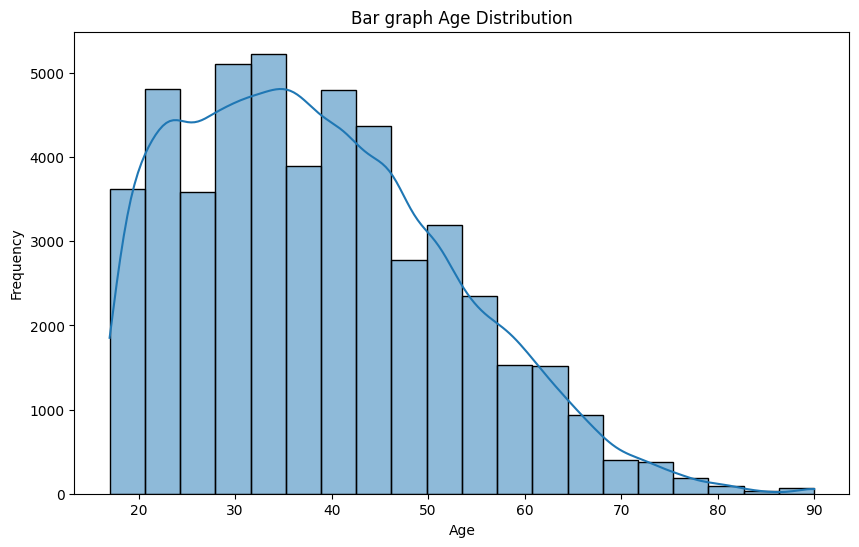

In [65]:
# Bar graph of age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Bar graph Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [66]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'occupation', 'race', 'hours-per-week', 'native-country', 'income',
       'Family_status', 'Asset_Value', 'Education_status'],
      dtype='object')

In [67]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=True)

In [68]:
# One-hot encode the categorical columns in x_train
df_encoded = pd.get_dummies(df)
df_encoded.head()

,age,fnlwgt,hours-per-week,Asset_Value,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,educational-num_1,educational-num_10,educational-num_11,educational-num_12,educational-num_13,educational-num_14,educational-num_15,educational-num_16,educational-num_2,educational-num_3,educational-num_4,educational-num_5,educational-num_6,educational-num_7,educational-num_8,educational-num_9,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native-country_?,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K,Family_status_DivorcedNot-in-familyFemale,Family_status_DivorcedNot-in-familyMale,Family_status_DivorcedOther-relativeFemale,Family_status_DivorcedOther-relativeMale,Family_status_DivorcedOwn-childFemale,Family_status_DivorcedOwn-childMale,Family_status_DivorcedUnmarriedFemale,Family_status_DivorcedUnmarriedMale,Family_status_Married-AF-spouseHusbandMale,Family_status_Married-AF-spouseOther-relativeFemale,Family_status_Married-AF-spouseOwn-childFemale,Family_status_Married-AF-spouseWifeFemale,Family_status_Married-civ-spouseHusbandFemale,Family_status_Married-civ-spouseHusbandMale,Family_status_Married-civ-spouseNot-in-familyFemale,Family_status_Married-civ-spouseNot-in-familyMale,Family_status_Married-civ-spouseOther-relativeFemale,Family_status_Married-civ-spouseOther-relativeMale,Family_status_Married-civ-spouseOwn-childFemale,Family_status_Married-civ-spouseOwn-childMale,Family_status_Married-civ-spouseWifeFemale,Family_status_Married-civ-spouseWifeMale,Family_status_Married-spouse-absentNot-in-familyFemale,Family_status_Married-spouse-absentNot-in-familyMale,Family_status_Married-spouse-absentOther-relativeFemale,Family_status_Married-spouse-absentOther-relativeMale,Family_status_Married-spouse-absentOwn-childFemale,Family_status_Married-spouse-absentOwn-childMale,Family_status_Married-spouse-absentUnmarriedFemale,Family_status_Married-spouse-absentUnmarriedMale,Family_status_Never-marriedNot-in-familyFemale,Family_status_Never-marriedNot-in-familyMale,Family_status_Never-marriedOther-relativeFemale,Family_status_Never-marriedOther-relativeMale,Family_status_Never-marriedOwn-childFemale,Family_status_Never-marriedOwn-childMale,Family_status_Never-marriedUnmarriedFema

In [69]:
# Separate features (X) and target (y)
X =df.drop('income', axis=1)
y = df['income']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
# One-hot encode the categorical columns in x_train
x_train_encoded = pd.get_dummies(X_train)
x_test_encoded = pd.get_dummies(X_test)

In [71]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Now you can scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train_encoded)
X_test_scaled = scaler.transform(x_train_encoded)

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

def classification_metrics(y_true, y_pred, label='', verbose=True, output_dict=False):
    # Get metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    if verbose:
        # Print Result with Label and Header
        header = "-" * 60
        print(header, f"Classification Metrics: {label}", header, sep='\n')
        print(f"- Accuracy = {accuracy:,.3f}")
        print(f"- Precision = {precision:,.3f}")
        print(f"- Recall = {recall:,.3f}")
        print(f"- F1-score = {f1:,.3f}")
        print("Confusion Matrix:")
        print(cm)
    if output_dict:
        metrics = {'Label': label, 'Accuracy': accuracy,
                   'Precision': precision, 'Recall': recall, 'F1-score': f1, 'Confusion Matrix': cm}
        return metrics

def evaluate_classification(clf, X_train, y_train, X_test, y_test, verbose=True, output_frame=False):
    # Get predictions for training data
    y_train_pred = clf.predict(X_train)

    # Call the helper function to obtain classification metrics for training data
    results_train = classification_metrics(y_train, y_train_pred, verbose=verbose,
                                            output_dict=output_frame,
                                            label='Training Data')
    print()
    # Get predictions for test data
    y_test_pred = clf.predict(X_test)
    # Call the helper function to obtain classification metrics for test data
    results_test = classification_metrics(y_test, y_test_pred, verbose=verbose,
                                           output_dict=output_frame,
                                           label='Test Data')

    # Store results in a dataframe if output_frame is True
    if output_frame:
        results_df = pd.DataFrame([results_train, results_test])
        # Set the label as the index
        results_df = results_df.set_index('Label')
        # Set index.name to none to get a cleaner looking result
        results_df.index.name = None
        # Return the dataframe
        return results_df.round(3)


In [73]:
# Initialize and train your classification model (for example, RandomForestClassifier)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Evaluate the classification model
results = evaluate_classification(clf, X_train, y_train, X_test, y_test, verbose=True, output_frame=True)
print(results)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Education_status
- Family_status
- education
- educational-num
- native-country
- ...
Feature names seen at fit time, yet now missing:
- Education_status_10th6
- Education_status_11th7
- Education_status_12th8
- Education_status_1st-4th2
- Education_status_5th-6th3
- ...


In [74]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Fit your model (replace RandomForestClassifier with your trained model)
clf.fit(X_train, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)

# Extract feature importances and names
feature_importance = perm_importance.importances_mean
feature_names = X.columns

# Sort feature importances and names
sorted_indices = feature_importance.argsort()[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the top 10 features
top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), sorted_feature_importance[:top_n], align='center')
plt.yticks(range(top_n), sorted_feature_names[:top_n])
plt.xlabel('Permutation Importance')
plt.title('Top 10 Features by Permutation Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


ValueError: could not convert string to float: 'Private'